In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Adh/Desktop/DMBI/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.rename(columns = {'Genre':'Gender'}, inplace = True) 

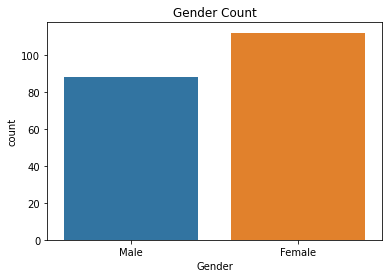

In [5]:
sns.countplot(data.Gender)
plt.title('Gender Count')
plt.show()

In [6]:
df = data.iloc[:, [2,4]].values

In [7]:
df

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [8]:
#from sklearn.decomposition import PCA
#pca=PCA().fit(df)
#print(pca.explained_variance_ratio_)
#print()
#print(df.columns.values.tolist())
#print(pca.components_)

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )

    kmeans.fit(df)

    wcss.append(kmeans.inertia_)



In [11]:
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23830.24505228461,
 19502.407839362197,
 15523.684014328754,
 13020.084512948228,
 11517.231348351697,
 10299.6983592504]

In [12]:
df

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

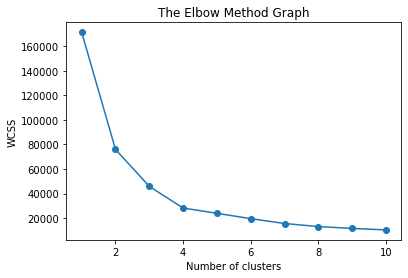

In [13]:
plt.plot(range(1,11),wcss,marker="o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

kmeans.fit(df)

KMeans(n_clusters=4, random_state=0)

In [15]:
data['cluster'] = kmeans.labels_

In [16]:
data

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [17]:
#plt.scatter(df[kmeans==0, 0], df[kmeans==0, 1], s=100, c='red', label ='Cluster 1')
#plt.scatter(df[kmeans==1, 0], df[kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
#plt.scatter(df[kmeans==2, 0], df[kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(df[kmeans==3, 0], df[kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
#plt.title('Clusters of Customers')
#plt.xlabel('Annual Income(k$)')
#plt.ylabel('Spending Score(1-100')
#plt.show()

In [18]:
df2 = data

In [19]:
df2.reset_index(level=0, inplace=True)

In [20]:
df3 = df2.groupby(["cluster"])['CustomerID'].count()

In [21]:
df3

cluster
0    47
1    57
2    48
3    48
Name: CustomerID, dtype: int64

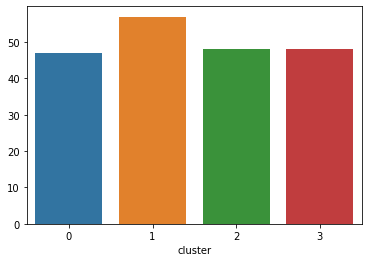

In [22]:
sns.barplot(x = df3.index, y = df3.values)

In [23]:
c=[0,1,2,3]
for i in range(4):
    c[i] = df2[df2['cluster'] == i]
    c[i] = c[i]['CustomerID'].reset_index()
    c[i].drop('index', axis=1, inplace=True)
    c[i]

In [24]:
c[0]

,CustomerID
0,1
1,5
2,17
3,18
4,21
5,28
6,44
7,46
8,48
9,49


In [25]:
cl0 = c[0].merge(data, left_on=['CustomerID'], right_on=['CustomerID'], how='inner')
cl1 = c[1].merge(data, left_on=['CustomerID'], right_on=['CustomerID'], how='inner')
cl2 = c[2].merge(data, left_on=['CustomerID'], right_on=['CustomerID'], how='inner')
cl3 = c[3].merge(data, left_on=['CustomerID'], right_on=['CustomerID'], how='inner')

In [26]:
cl0

,CustomerID,index,Gender,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,0,Male,19,15,39,0
1,5,4,Female,31,17,40,0
2,17,16,Female,35,21,35,0
3,18,17,Male,20,21,66,0
4,21,20,Male,35,24,35,0
5,28,27,Male,35,28,61,0
6,44,43,Female,31,39,61,0
7,46,45,Female,24,39,65,0
8,48,47,Female,27,40,47,0
9,49,48,Female,29,40,42,0


In [27]:
cl0.describe()

,CustomerID,index,Age,Annual_Income_(k$),Spending_Score,cluster
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,83.255319,82.255319,27.617021,53.276596,49.148936,0.0
std,40.604919,40.604919,7.167418,17.356495,9.136593,0.0
min,1.000000,0.000000,18.000000,15.000000,29.000000,0.0
25%,52.500000,51.500000,21.000000,42.500000,41.500000,0.0
50%,88.000000,87.000000,27.000000,57.000000,50.000000,0.0
75%,112.500000,111.500000,32.500000,63.500000,55.500000,0.0
max,185.000000,184.000000,41.000000,99.000000,66.000000,0.0


In [28]:
cl1.describe()

,CustomerID,index,Age,Annual_Income_(k$),Spending_Score,cluster
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.0
mean,115.157895,114.157895,30.175439,66.070175,82.350877,1.0
std,69.515617,69.515617,5.535995,32.405830,8.913255,0.0
min,2.000000,1.000000,18.000000,15.000000,68.000000,1.0
25%,34.000000,33.000000,27.000000,33.000000,75.000000,1.0
50%,142.000000,141.000000,30.000000,75.000000,81.000000,1.0
75%,172.000000,171.000000,35.000000,87.000000,90.000000,1.0
max,200.000000,199.000000,40.000000,137.000000,99.000000,1.0


In [29]:
cl2.describe()

,CustomerID,index,Age,Annual_Income_(k$),Spending_Score,cluster
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,115.333333,114.333333,43.291667,66.937500,15.020833,2.0
std,71.062853,71.062853,11.761745,33.346923,8.753090,0.0
min,3.000000,2.000000,19.000000,16.000000,1.000000,2.0
25%,32.500000,31.500000,36.000000,32.250000,7.750000,2.0
50%,147.000000,146.000000,44.000000,77.500000,14.000000,2.0
75%,173.500000,172.500000,52.000000,87.250000,20.500000,2.0
max,199.000000,198.000000,67.000000,137.000000,32.000000,2.0


In [30]:
cl3.describe()

,CustomerID,index,Age,Annual_Income_(k$),Spending_Score,cluster
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,85.145833,84.145833,55.708333,54.770833,48.229167,3.0
std,27.188851,27.188851,8.557585,9.852615,6.922795,0.0
min,41.000000,40.000000,43.000000,38.000000,35.000000,3.0
25%,63.750000,62.750000,48.750000,47.000000,43.000000,3.0
50%,82.000000,81.000000,53.500000,54.000000,48.000000,3.0
75%,105.500000,104.500000,65.000000,62.250000,53.500000,3.0
max,161.000000,160.000000,70.000000,79.000000,60.000000,3.0


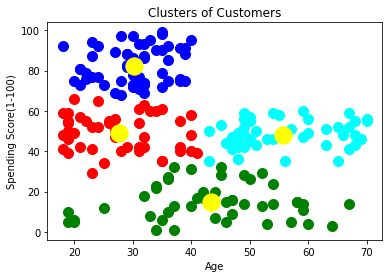

In [31]:
plt.scatter(cl0['Age'], cl0['Spending_Score'], s=100, c='red', label ='Cluster 0')
plt.scatter(cl1['Age'], cl1['Spending_Score'], s=100, c='blue', label ='Cluster 1')
plt.scatter(cl2['Age'], cl2['Spending_Score'], s=100, c='green', label ='Cluster 2')
plt.scatter(cl3['Age'], cl3['Spending_Score'], s=100, c='cyan', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()
plt.show()